In [1]:
from bs4 import BeautifulSoup
import requests
import re
import json
import sys
import os
import scrapping_functions as sf
import pandas as pd
import matplotlib.pyplot as plt
import operator
import re
import numpy as np

base_url = 'https://www.yelp.com'

In [2]:
os.getcwd()

'C:\\Users\\835861\\projects\\georgetown\\yelp-classification\\Yelp_web_scrapper'

In [3]:
#test = json.load(open('C:\\Users\\835861\\projects\\georgetown\\yelp-classification\\Yelp_web_scrapper\\dc_reviews.json'))
reviews = json.load(open('C:\\Users\\835861\\projects\\georgetown\\yelp-classification\\Yelp_web_scrapper\\dc_reviews.json'))

In [4]:
#biz_test = json.load(open('C:\\Users\\835861\\projects\\georgetown\\yelp-classification\\Yelp_web_scrapper\\biz_details.json'))
business = json.load(open('C:\\Users\\835861\\projects\\georgetown\\yelp-classification\\Yelp_web_scrapper\\biz_details.json'))

In [5]:
business_dict =  {}

for key in business.keys():
    category_list = business[key]['category_aliases'].split(',')
    #print(category_list)
    
    for item in category_list:
        if item not in business_dict:
            business_dict[item] = 1
        else:
            business_dict[item] += 1

sorted_business_dict = sorted(business_dict.items(), key=operator.itemgetter(1))
print(sorted_business_dict)

top_five_categories = sorted_business_dict[-5:-1]
top_five_categories.append(sorted_business_dict[-1])

print("\nThe top 5 categories are : " + str(top_five_categories))


[('empanadas', 1), ('caribbean', 1), ('restaurants', 1), ('convenience', 1), ('raw_food', 1), ('tex-mex', 1), ('turkish', 1), ('lebanese', 1), ('chickenshop', 1), ('cookingclasses', 1), ('bakeries', 1), ('creperies', 1), ('jazzandblues', 1), ('tapas', 1), ('fishnchips', 1), ('irish', 1), ('southern', 1), ('cuban', 1), ('salvadoran', 1), ('srilankan', 1), ('bedbreakfast', 1), ('whiskeybars', 1), ('petadoption', 1), ('themedcafes', 1), ('food_court', 1), ('meats', 1), ('bookstores', 1), ('brazilian', 1), ('austrian', 1), ('izakaya', 1), ('distilleries', 1), ('african', 1), ('filipino', 1), ('tea', 1), ('beer_and_wine', 2), ('juicebars', 2), ('chicken_wings', 2), ('bagels', 2), ('greek', 2), ('tapasmallplates', 2), ('ethiopian', 2), ('desserts', 2), ('modern_european', 2), ('gluten_free', 2), ('pakistani', 2), ('gastropubs', 2), ('bbq', 2), ('hotdogs', 3), ('vegan', 3), ('halal', 3), ('pubs', 3), ('burgers', 3), ('japanese', 3), ('afghani', 3), ('belgian', 3), ('breweries', 3), ('sportsba

In [6]:
xaxis = ""
yaxis = ""

for category in top_five_categories:
    category_names_values = str(category).split(',')  
    category_names_values[0] = category_names_values[0][1:]
    category_names_values[1] = category_names_values[1][:-1]
    xaxis += category_names_values[0] + ','
    yaxis += category_names_values[1] + ','

# index 0 is X-axis value, index 1 is Y-axis
xaxis = xaxis[0:-1]
yaxis = yaxis[0:-1]
print(xaxis)
print(yaxis)

'delis','sandwiches','french','newamerican','bars'
 199, 219, 321, 364, 540


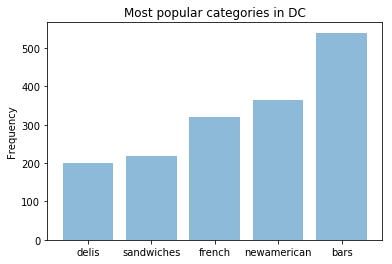

In [7]:
objects = ('delis','sandwiches','french','newamerican','bars')
y_pos = np.arange(len(objects))
performance = [199, 219, 321, 364, 540]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Most popular categories in DC')
 
plt.show()


In [8]:
rating_dict =  {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0}



for key in reviews.keys():
    reviews_list = reviews[key]['review']
    
    for review in reviews_list:
        ratingValue = str(review['reviewRating']['ratingValue'])
        # find ratingValue as key in rating_dict and increment value
        rating_dict[ratingValue] = rating_dict.get(ratingValue, 0) + 1
        #print("ratingValue : " + ratingValue)
    
print("1star:" + str(rating_dict['1']))
print("2star:" + str(rating_dict['2']))
print("3star:" + str(rating_dict['3']))
print("4star:" + str(rating_dict['4']))
print("5star:" + str(rating_dict['5']))


1star:439
2star:629
3star:1469
4star:3335
5star:4018


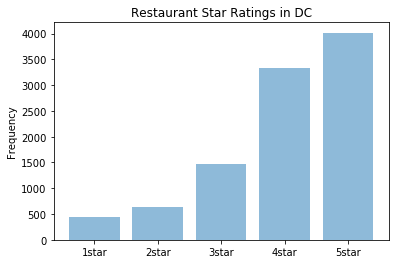

In [11]:
xaxis_rev = ('1star','2star','3star','4star','5star')
y_pos_rev = np.arange(len(xaxis_rev))
yaxis_rev = [rating_dict['1'],rating_dict['2'],rating_dict['3'],rating_dict['4'],rating_dict['5']]


plt.bar(y_pos_rev, yaxis_rev, align='center', alpha=0.5)
plt.xticks(y_pos_rev, xaxis_rev)
plt.ylabel('Frequency')
plt.title('Restaurant Star Ratings in DC')
 
plt.show()